#Video Level data

In [24]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
from IPython.display import YouTubeVideo
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))
print(check_output(["ls", "../input/video_level"]).decode("utf8"))
video_lvl_record = "../input/video_level/train-1.tfrecord"
frame_lvl_record = "../input/frame_level/train-1.tfrecord"
labels_df = pd.read_csv('../input/label_names.csv')

frame_level
label_names.csv
sample_submission.csv
video_level

train-0.tfrecord
train-1.tfrecord
train-2.tfrecord
train-3.tfrecord
train-4.tfrecord
train-5.tfrecord
train-6.tfrecord
train-7.tfrecord
train-8.tfrecord
train-9.tfrecord



In [25]:
## Reading video level data in tfrecord format
vid_ids = []
labels = []
mean_rgb = []
mean_audio = []
textual_labels = []
textual_labels_nested = []

label_counts = []

for example in tf.python_io.tf_record_iterator(video_lvl_record):
    tf_example = tf.train.Example.FromString(example)
    vid_ids.append(tf_example.features.feature['video_id'].bytes_list.value[0].decode(encoding='UTF-8'))
    label_example = tf_example.features.feature['labels'].int64_list.value
    labels.append(label_example)
    label_counts.append(len(label_example))
    mean_rgb.append(tf_example.features.feature['mean_rgb'].float_list.value)
    mean_audio.append(tf_example.features.feature['mean_audio'].float_list.value)
    
    label_example_textual = list(labels_df[labels_df['label_id'].isin(list(label_example))]['label_name'])
    textual_labels_nested.append(set(label_example_textual))
    textual_labels = textual_labels + label_example_textual
    
## The size of this tfrecord:
print('Number of videos in this tfrecord: ',len(vid_ids))


Number of videos in this tfrecord:  1178


### Let's explore the first video 

In [26]:
## Let's explore the first video 
from collections import Counter
label_mapping = pd.Series.from_csv('../input/label_names.csv',header=0).to_dict()
print('The video id is: %str ' %vid_ids[0]) # https://www.youtube.com/watch?v=-1VnJGJ6c2U
label_names = [label_mapping[x] for x in labels[0]]
print('The labels of this video are: ',label_names )
print('The first video has a vector of %d rgb features' %len(mean_rgb[0]))
print('The first video has a vector of %d audio features' %len(mean_audio[0]))
print('The vector rgb feature (first 10) for this video is: ')
print(mean_rgb[0][:10])
print('The vector audio feature (first 10) for this video is:') 
print(mean_audio[0][:10])


The video id is: -1VnJGJ6c2Utr 
The labels of this video are:  ['Games', 'Football', 'Animal', 'The Sims', 'Need for Speed: Most Wanted']
The first video has a vector of 1024 rgb features
The first video has a vector of 128 audio features
The vector rgb feature (first 10) for this video is: 
[-0.012599143199622631, 0.3304528594017029, -0.29592639207839966, -0.36568647623062134, -0.8026612401008606, 0.21889519691467285, 0.35500529408454895, -0.2260688841342926, -0.5064732432365417, 0.07810844480991364]
The vector audio feature (first 10) for this video is:
[0.15390920639038086, -0.5002377033233643, 0.6098828911781311, 0.3337654769420624, 0.7686942219734192, -0.30625399947166443, -0.04251023754477501, -0.988168478012085, -0.3268117904663086, 0.27072811126708984]


### Let's explore the feature vectors of the first video (rgb and audio vectors)

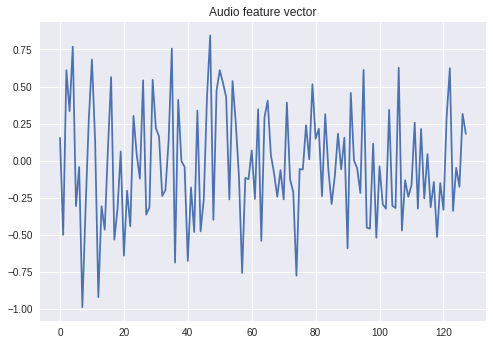

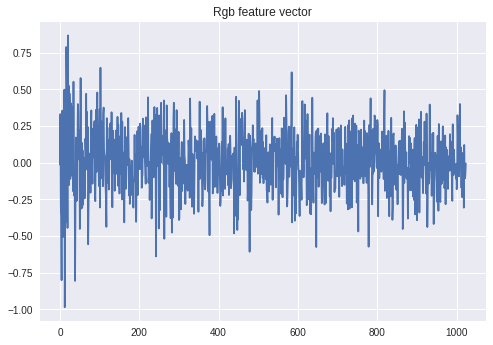

In [27]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title('Audio feature vector')
plt.plot(mean_audio[0][:])

plt.figure(2)
plt.title('Rgb feature vector')
plt.plot(mean_rgb[0][:])

# Frame level data for the first video

In [28]:
# Reading frame level data for the first video

feat_rgb = []
feat_audio = []

for example in tf.python_io.tf_record_iterator(frame_lvl_record):        
    tf_seq_example = tf.train.SequenceExample.FromString(example)
    n_frames = len(tf_seq_example.feature_lists.feature_list['audio'].feature)
    sess = tf.InteractiveSession()
    rgb_frame = []
    audio_frame = []
    # iterate through frames
    for i in range(n_frames):
        rgb_frame.append(tf.cast(tf.decode_raw(
                tf_seq_example.feature_lists.feature_list['rgb'].feature[i].bytes_list.value[0],tf.uint8)
                       ,tf.float32).eval())
        audio_frame.append(tf.cast(tf.decode_raw(
                tf_seq_example.feature_lists.feature_list['audio'].feature[i].bytes_list.value[0],tf.uint8)
                       ,tf.float32).eval())
        
        
    sess.close()
    feat_rgb.append(rgb_frame)
    feat_audio.append(audio_frame)
    break

## Let's explore the feature vectors of the first video

The first video has 161 frames
The rgb feature vector of the first frame has 1024 lenght
The audio feature vector of the first frame has 128 lenght
The first frame has the rgb feature vector: [   0.   93.  157. ...,  129.  111.   85.]
The first frame has the audio feature vector: [ 174.   27.  130.   94.  190.   87.   62.  165.  143.  157.  146.   67.
  131.  152.   87.  227.  114.  255.  206.  250.   48.    0.  104.   52.
  172.  133.  120.  184.  141.   36.  157.  124.  114.   73.  178.  139.
  144.  131.  219.  140.   95.  164.  171.  129.  122.  134.  134.  104.
  166.   73.  126.   78.  155.   70.  122.   47.   83.  150.  101.  142.
  105.  138.  153.  144.  113.  132.  154.  121.  138.  107.  136.  146.
  142.  150.  119.  129.  119.  122.  164.  130.  116.  112.  112.  127.
  140.  134.  140.  114.  110.  116.  136.  110.  112.  151.  131.  114.
  129.  120.  107.  108.  123.  117.  125.  102.  137.  147.  146.  153.
  133.  127.  135.  121.  128.  142.  143.  123.  151.  126.  

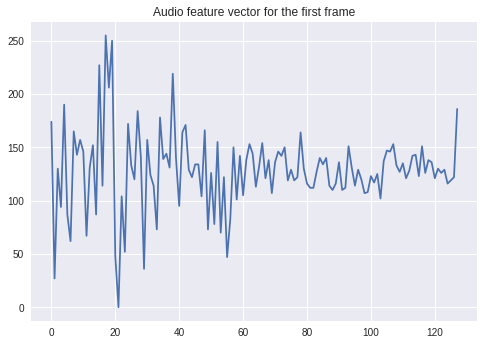

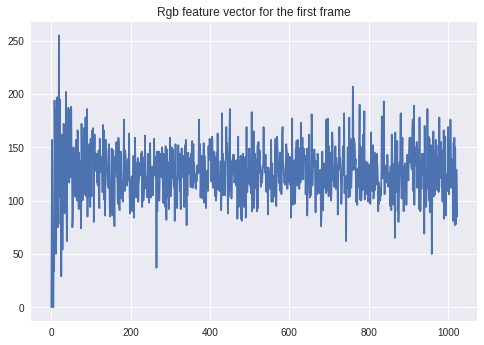

In [29]:
print('The first video has %d frames' %len(feat_rgb[0]))
print('The rgb feature vector of the first frame has %d lenght' %len(feat_rgb[0][0]))
print('The audio feature vector of the first frame has %d lenght' %len(feat_audio[0][0]))
print('The first frame has the rgb feature vector:', feat_rgb[0][0])
print('The first frame has the audio feature vector:', feat_audio[0][0])

plt.figure(1)
plt.title('Audio feature vector for the first frame')
plt.plot(feat_audio[0][0])

plt.figure(2)
plt.title('Rgb feature vector for the first frame')
plt.plot(feat_rgb[0][0])


# Vocabulary

In [30]:
print(labels_df)
print("Nevertheless, we have {} unique labels in the dataset".format(len(labels_df['label_name'].unique())))

      label_id                      label_name
0            0                           Games
1            1                         Vehicle
2            2                      Video game
3            3                         Concert
4            4                             Car
5            5                           Dance
6            6                       Animation
7            7                        Musician
8            8                        Football
9            9                     Music video
10          10                          Animal
11          11                      Motorsport
12          12                            Food
13          13                Musical ensemble
14          14                          Guitar
15          15                         Cartoon
16          16                 Performance art
17          17                          Racing
18          18              Outdoor recreation
19          19                         PC game
20          2

****

# Traning data (Only first 1178 videos)

### Label distribution

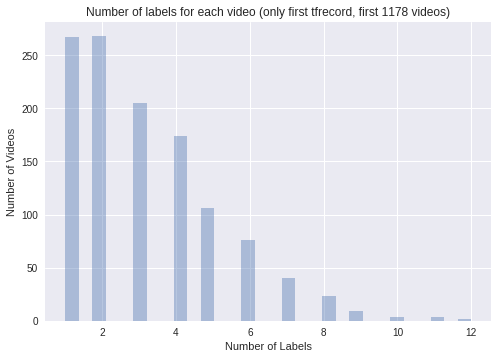

In [31]:
sns.distplot(label_counts, kde=False)
plt.title('Number of labels for each video (only first tfrecord, first 1178 videos)')
plt.ylabel('Number of Videos')
plt.xlabel('Number of Labels')

# In this plot we can observe that in the first record we have mostly 1-4 labels describing each video

### Top labels distribution (1 label, 2 labels, 3 labels)

In [32]:
# define helper function to group data
def grouped_data_for(l):
    # wrap the grouped data into dataframe, since the inner is pd.Series, not what we need
    l_with_c = pd.DataFrame(
        pd.DataFrame({'label': l}).groupby('label').size().rename('n')
    ).sort_values('n', ascending=False).reset_index()
    return l_with_c

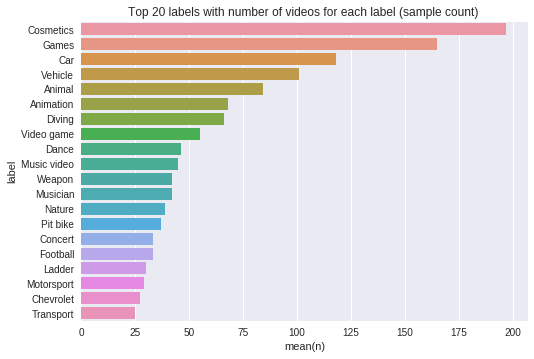

In [33]:
N = 20

textual_labels_with_counts_all = grouped_data_for(textual_labels)

sns.barplot(y='label', x='n', data=textual_labels_with_counts_all.iloc[0:N, :])
plt.title('Top {} labels with number of videos for each label (sample count) '.format(N))

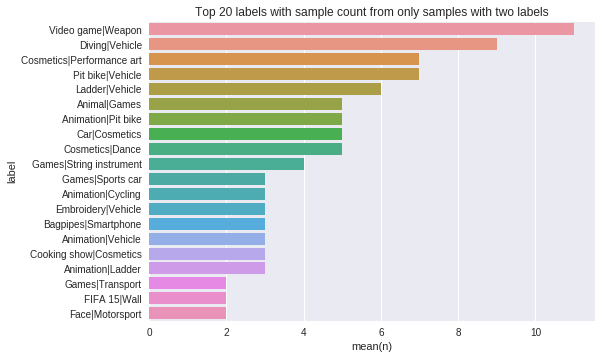

In [34]:
two_element_labels = ['|'.join(sorted(x)) for x in textual_labels_nested if len(x) == 2]

N = 20

textual_labels_with_counts = grouped_data_for(two_element_labels)

sns.barplot(y='label', x='n', data=textual_labels_with_counts.iloc[0:N, :])
plt.title('Top {} labels with sample count from only samples with two labels'.format(N))

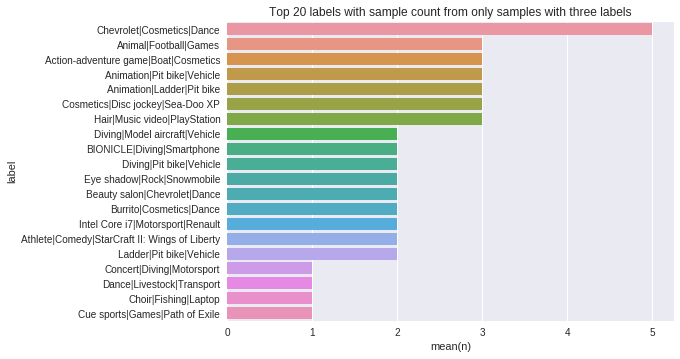

In [35]:
two_element_labels = ['|'.join(sorted(x)) for x in textual_labels_nested if len(x) == 3]

N = 20

textual_labels_with_counts = grouped_data_for(two_element_labels)

sns.barplot(y='label', x='n', data=textual_labels_with_counts.iloc[0:N, :])
plt.title('Top {} labels with sample count from only samples with three labels'.format(N))

### Correlation between labels in training data

In [36]:
top_50_labels = list(textual_labels_with_counts_all['label'][0:50].values)

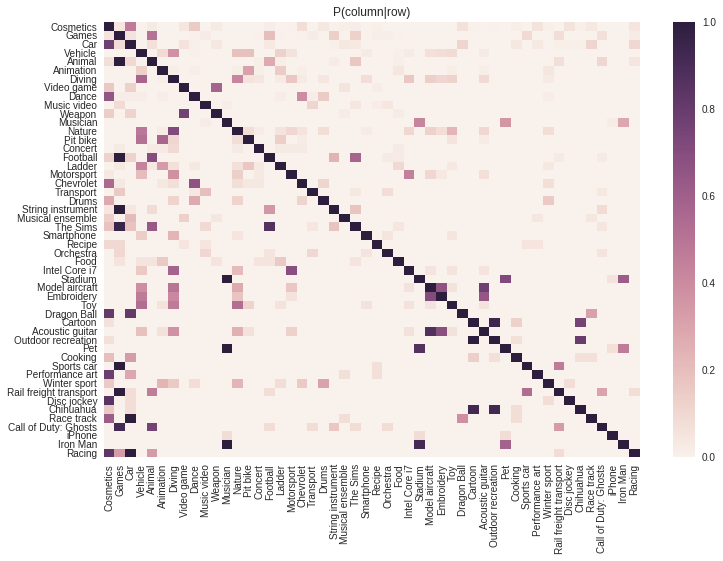

In [37]:
K_labels = []

for i in top_50_labels:
    row = []
    for j in top_50_labels:
        # find all records that have label `i` in them
        i_occurs = [x for x in textual_labels_nested if i in x]
        # how often does j occur in total in them?
        j_and_i_occurs = [x for x in i_occurs if j in x]
        k = 1.0*len(j_and_i_occurs)/len(i_occurs)
        row.append(k)
    K_labels.append(row)

K_labels = np.array(K_labels)
K_labels = pd.DataFrame(K_labels)
K_labels.columns = top_50_labels
K_labels.index = top_50_labels

plt.figure(figsize=(12,8))
sns.heatmap(K_labels)
# probability of observing column label given row label
plt.title('P(column|row)')